# Project Overview

This is the final project report of DATA 2060 Machine Learning: from Theorem to Algorithm class. Our group member includes:  
[Enno Moench](enno_moench@brown.edu)  
[Janet Joseph](janetjoseph@brown.edu)  
[Xueru Ma](xueru_ma@brown.edu)  
[Yishu Li](yishu_li@brown.edu)  

Here's our [GitHub repo](https://github.com/Yishu-Li/DATA2060Final).  

## Our work
We first chose the Gaussian Naive Bayes as our project, implemented the model and compared with Sci-kit learn package GaussianNB class. The performance of our model is exactly the same as the performance of the Sci-kit learn methods. However, according to the assumption of the Naive Bayes, all the features should be independent to each other, which is not always true in real data. Therefore, to fulfill this assumption, we tried to first use a PCA dimension-reduction to first rotate the feature axes, make the features independent to each other, and then perform the GNB decoding. However, the result turned our not as good as we expected, the PCA-GNB decoder only outperformed the GNB model in Sci-kit learn digits dataset, so we implemented another multiPCA-GNB model, where we train different PCAs for different classes. The multiPCA-GNB method finally outperformed the GNB and PCA-GNB model in every dataset we tested.

# Background Knowledge


## Gaussian Naive Bayes



Gaussian Naive Bayes method is a algorithm belonging to Naive Bayes
methods. Naive Bayes methods are based on Bayes' theorem while assuming
that each feature in the domain set is independent to each other. Given
input feature $x_1$ to $x_n$ and class variable $y$, the Bayes Theorem
can be expressed as:  

$$P(y|x_1,...,x_n)=\frac{P(y)P(x_1,...,x_n|y)}{P(x_1,...,x_n)}$$

As we assumed that each feature is independent to each other, we have:

$$P(x_1,...,x_n|y)=\displaystyle\prod_{i=1}^n P(x_i|y)$$

Therefore, we can get:

$$P(y|x_1,...,x_n)=\frac{P(y)\displaystyle\prod_{i=1}^n P(x_i|y)}{P(x_1,...,x_n)}$$

Since the input is given, $P(x_1,...,x_n)$ is a constant, we can
estimate the probility using only the numerator:

$$P(y|x_1,...,x_n)\propto P(y)\displaystyle\prod_{i=1}^n P(x_i|y)$$
$$\hat{y}=\underset{y}{argmax}P(y)\displaystyle\prod_{i=1}^n P(x_i|y)$$

In Gaussian Naive Bayes, we assume Gaussian distribution for the
likelihoods of the features:

$$P(x_i|y)=\frac{1}{\sqrt{2\pi\sigma^2_y}}e^{-\frac{(x_i-\mu_y)^2}{2\sigma^2_y}}$$

Therefore, we can estimate the Gaussian distribution likelihood from the
mean and variance of the input features.

## PCA-GNB classifier
We've already implemented the Gaussian Naive Bayes (GNB) classifier above. However, when visualizing the gaussian distributions, we found that the Gaussian ellipses always has their axis perpendicular to the feature axis. This is because GNB assumes that all the features are independent to each other. But in reality, features are often correlated. Therefore, we can add a PCA to eliminate the correlations between features. The conditional likelihood of each principle component is assumed to follow Gaussian distribution.  



### PCA dimension-reduction
PCA is a dimension-reduction technique that can be used to reduce the dimensionality of a dataset while preserving as much of the variance as possible. It works by finding the principal components of the data, which are the directions in which the data varies the most. 

To find the principal components $v_{1}$, $\ldots$, $v_{n}$, the goal is to minimize the reconstruction error:

$$V_k=\underset{V_k: V_k^{\top} V_k=I}{\arg \min } \sum_{i=1}^m\left\|\mathbf{x}_i-V_k V_k^{\top} \mathbf{x}_i\right\|_2^2$$

This minimization finds the directions $v_{1}$, $\ldots$, $v_{n}$ that retain the maximum variance in the data while reducing redundancy.

The first principal component is the direction in which the data varies the most, the second principal component is the direction in which the data varies the second most, and so on. By projecting the data onto the first few principal components, we can reduce the dimensionality of the data while preserving most of the variance.  

PCA is calculated using eigenvalue decomposition. First, we need to standardize the data so that all features contribute equally to PCA.

For a dataset $X \in \mathbb{R}^{n \times m}$, where $n$ is the number of samples and $m$ is the number of features:  
$$X_{\text {scaled }}(i, j)=\frac{X(i, j)-\mu_j}{\sigma_j}$$  
where:
$\mu_j=\frac{1}{n} \sum_{i=1}^n X(i, j)$ is the mean of the $j$-th feature and $\sigma_j=\sqrt{\frac{1}{n} \sum_{i=1}^n\left(X(i, j)-\mu_j\right)^2}$ is the standard deviation of the $j$-th feature.

Then the covariance matrix of the data is calculated, which quantifies how features vary together:

$$
C=\frac{1}{n-1} X_{\text {scaled }}^T X_{\text {scaled }}
$$

$C \in \mathbb{R}^{m \times m}$, where each entry $C(i, j)$ represents the covariance between features $i$ and $j$.

Then the eigenvectors and eigenvalues of the covariance matrix are found, we have
$$
C v_i=\lambda_i v_i
$$

rewriting $C$ in matrix form:

$$
C=V D V^{\top}
$$

where $V=\left[v_1, v_2, \ldots, v_m\right]$ is matrix of all $m$ eigenvectors, 
$D=\operatorname{diag}\left(\lambda_1, \lambda_2, \ldots, \lambda_m\right)$ represents diagonal matrix of eigenvalues.

Here $v_i \in \mathbb{R}^m$ is the $i$-th eigenvector (principal component) and $\lambda_i \in \mathbb{R}$ is the corresponding eigenvalue, representing the variance explained by $v_i$.

The principal components are sorted by their eigenvalues in descending order,

$$
\lambda_1 \geq \lambda_2 \geq \cdots \geq \lambda_m
$$

and we arrange their corresponding eigenvectors $v_i$ to form a matrix $V$ where:

$$
V=\left[v_1, v_2, \ldots, v_m\right]
$$

The first few principal components are selected to form the new feature space(here we choose top k eigenvectors).

$$
V_k=\left[v_1, v_2, \ldots, v_k\right]
$$


The number $k$ is often chosen such that the cumulative variance explained by the selected components exceeds a threshold (e.g., 95\%):

$$
\frac{\sum_{i=1}^k \lambda_i}{\sum_{i=1}^m \lambda_i} \geq \text { threshold }
$$

Finally, we project data onto reduced dimensional space:

$$
X_{\mathrm{PCA}}=X_{\text {scaled }} V_k
$$

Since the principal components are the eigenvectors, they are orthogonal to each other, which supports the assumption of GNB.

### GNB classifier on selected PCs
After the PCA dimension-reduction is applied, we can now train the GNB on the selected first few PCs. The dimension-reduced data is not only independent, but also noise-reduced, which leads to higher GNB classification performance.

To train the GNB model, for each class $c \in\{1,2, \ldots, C\}$,
first we compute the mean and variance vectors for the principal components, as we discussed earlier:

$\mu_c=\frac{1}{N_c} \sum_{i \in c} X_{\mathrm{PCA}, i}$

$\sigma_c^2=\frac{1}{N_c} \sum_{i \in c}\left(X_{\mathrm{PCA}, i}-\mu_c\right)^2$

where $N_c$ is the number of samples in class $c$.

Then the likelihood of a data point $X_{\mathrm{PCA}}$ belonging to class $c$ is given by:

$$
P\left(X_{\mathrm{PCA}} \mid y=c\right)=\prod_{j=1}^k \frac{1}{\sqrt{2 \pi \sigma_{c j}^2}} \exp \left(-\frac{\left(X_{\mathrm{PCA}, j}-\mu_{c j}\right)^2}{2 \sigma_{c j}^2}\right)
$$

After that, we would predict the class by using Bayes' theorem, computing the posterior probability:

$$
P\left(y=c \mid X_{\mathrm{PCA}}\right) \propto P(y=c) \cdot P\left(X_{\mathrm{PCA}} \mid y=c\right)
$$

where $P(y=c)$ is the prior probability of class $c$, often estimated as:

$P(y=c)=\frac{N_c}{N}$ with $N$ as the total number of samples.

Finally we classify the data point $X_{\mathrm{PCA}}$ into the class with the highest posterior probability:

$$
\hat{y}=\arg \max _c P\left(y=c \mid X_{\mathrm{PCA}}\right)
$$

# Models Implement

## Gaussian Naive Bayes



First, we would divide our dataset by diifferent class labels, for each feature within each class, we would calculate the mean and variance.

For a given feature $x_i$ within a class $y$ :

$\mu_{y, i}=\frac{1}{N_y} \sum_{j=1}^{N_y} x_{j, i}$

$\sigma_{y, i}^2=\frac{1}{N_y-1} \sum_{j=1}^{N_y}\left(x_{j, i}-\mu_{y, i}\right)^2$

Here $N_y$ is the number of instances in class $y$, and $x_{j, i}$ is the $i$-th feature of the $j$-th instance in class $y$.

With those means and variances computed, we can use them to compute the Gaussian probability for each feature value given the class, and thus apply the Gaussian Naive Bayes classification

Here is the Gaussian probability density function
$$
P(x_i \mid y) = \frac{1}{\sqrt{2 \pi \sigma_{y,i}^2}} \exp \left( -\frac{(x_i - \mu_{y,i})^2}{2 \sigma_{y,i}^2} \right)
$$

With the Gaussian probability formula, we can compute $P(x_i \mid y)$ for each feature $x_i$ and class $y$:

For feature $x_1$ within class $y$:
   $$
   P(x_1 \mid y) = \frac{1}{\sqrt{2 \pi \sigma_{y,1}^2}} \exp \left( -\frac{(x_1 - \mu_{y,1})^2}{2 \sigma_{y,1}^2} \right)
   $$

For feature $x_2$ within the same class $y$:
   $$
   P(x_2 \mid y) = \frac{1}{\sqrt{2 \pi \sigma_{y,2}^2}} \exp \left( -\frac{(x_2 - \mu_{y,2})^2}{2 \sigma_{y,2}^2} \right)
   $$

   We would repeat this calculation for all features within each class.

   Continue those steps in Background knowledge,

   When we have $$P(y|x_1,...,x_n)\propto P(y)\displaystyle\prod_{i=1}^n P(x_i|y)$$


   $$\hat{y} = \underset{y}{\arg \max} \; P(y) \prod_{i=1}^n P(x_i | y)$$

   If we take logarithm on both sides, then we will have $$\log \left( P(y | x_1, \dots, x_n) \right) = \log \left( P(y) \prod_{i=1}^n P(x_i | y) \right)$$

   Thus by the sum property of logarithm, we will have
   $$\log \left( P(y | x_1, \dots, x_n) \right) = \log(P(y)) + \sum_{i=1}^n \log(P(x_i | y))$$

   Finally we will get $$\hat{y} = \underset{y}{\arg \max} \; \left( \log(P(y)) + \sum_{i=1}^n \log(P(x_i | y)) \right)$$ where $\hat{y} $  represents the predicted class




   




In [1]:
import numpy as np
import pickle #for saving the model

class GNB():
    '''
    Gaussian Naive Bayes model.
    The conditional likelihood of each feature is assumed to follow
    Gaussian distribution.

    @attrs:
        n_classes: int, the number of classes
        attrs_mu: a 2D (n_classes x n_attributes) NumPy array of the means
              of the Gaussian distribution for each feature
        attrs_sig: a 2D (n_classes x n_attributes) NumPy array of the
              variances of the Gaussian distribution for each feature
        priors: a 1D NumPy array of the priors distribution
    ''' 

    def __init__(self):
        """
        Initializes a Gaussian Naive Bayes model with n_classes.
        """
        self.n_classes = None
        self.attrs_mu = None
        self.attrs_sig = None
        self.prior = None

    def train(self, X_train, y_train, epsilon=1e-9):
        """
        Trains the model, using maximum likelihood estimation.

        @params:
            X_train: a 2D (n_examples x n_attributes) numpy array
            y_train: a 1D (n_examples) numpy array
        @return:
            a tuple consisting of:
                1) a 2D numpy array of means of the conditional likelihoods
                2) a 2D numpy array of variance of the conditional likelihoods
                3) a 1D numpy array of the priors distribution
        """
        n_features = X_train.shape[1]
        self.n_classes = len(set(y_train))
        self.attrs_mu = np.zeros((self.n_classes, n_features))
        self.attrs_sig = np.zeros((self.n_classes, n_features))
        self.priors = np.zeros(self.n_classes)

        for c in range(self.n_classes):
            X_c = X_train[y_train == c]
            self.attrs_mu[c, :] = X_c.mean(axis=0)
            self.attrs_sig[c, :] = X_c.var(axis=0)
            self.priors[c] = X_c.shape[0] / X_train.shape[0]

        # Add epsilon to variance to avoid division by zero
        self.attrs_sig += epsilon*np.var(X_train, axis=0).max()

        return self.attrs_mu, self.attrs_sig, self.priors



    def predict_log_prob(self, inputs):
        """
        Outputs a joint log probability for each input in inputs.

        @params:
            inputs: a 2D NumPy array containing inputs
        @return:
            a 2D numpy array of predicted probabilities for each class
        """
        log_probs = []
        for c in range(self.n_classes):
            log_prior = np.log(self.priors[c])
            log_likelihood = np.sum(
                (self._log_gaussian_prob(inputs, self.attrs_mu[c], self.attrs_sig[c])),
                axis=1
            )
            log_probs.append(log_prior + log_likelihood)
        log_probs = np.array(log_probs).T
        return log_probs
  

    def predict_prob(self, inputs):
        """
        Outputs a predicted probability for each input in inputs.

        @params:
            inputs: a 2D NumPy array containing inputs
        @return:
            a 2D numpy array of predicted probabilities for each class
        """
        probs = np.exp(self.predict_log_prob(inputs))
        return probs


    def predict(self, inputs):
      """
      Outputs a predicted label for each input in inputs.
      We compute log sum rather than multiply the probabilities.

      @params:
          inputs: a 2D NumPy array containing inputs
      @return:
          a 1D numpy array of predictions
      """
      log_probs = self.predict_prob(inputs)
      return np.argmax(log_probs, axis=1)



    def accuracy(self, X_test, y_test):
        """
        Outputs the accuracy of the trained model on a given dataset (data).

        @params:
            X_test: a 2D numpy array of examples
            y_test: a 1D numpy array of labels
        @return:
            a float number indicating accuracy (between 0 and 1)
        """

        y_pred = self.predict(X_test)
        return np.mean(y_pred == y_test)


    def _log_gaussian_prob(self, x, mu, sig):
        """
        Calculate the gaussian probability for given input x and Gaussian
        distribution parameters

        @params:
            x:  a float number to calculate the probability
            mu: the mean of the Gaussian distribution
            sig: the variance of the Gaussian distribution
        @return:
            a float number between 0-1 indicating the likelihood
        """
        exponent = -((x - mu) ** 2) / (2 * sig)
        return np.log(1 / np.sqrt(2 * np.pi * sig)) + exponent

    def save(self, filename):
          """
          Save the trained model to a file using pickle.

          @params:
              filename: a string, the name of the file to save the model
          """
          with open(filename, 'wb') as f:
              pickle.dump(self, f)

    @staticmethod
    def load(filename):
        """
        Load a GaussianNB model from a file using pickle.

        @params:
            filename: a string, the name of the file to load the model from
        @return:
            GaussianNB object
        """
        with open(filename, 'rb') as f:
            return pickle.load(f)

**Note:**  
To avoid some extreme value where 0 appears in log function or denominator, we add a small number $\epsilon$ to the variance. We found in Scikit-learn, 1e-9 was chosen as the $\epsilon$ value. However, after we implemented the model, we found our model has lower accuracy than the Scikit-learn model. By reading the sklearn code, I found that $\epsilon$ was not simply added to the var, but was first multiplied by the maximum of the variance and then added to the variance to adjust to different variance scales. After changing our code to the same logic, we finally got the same performance as sklearn GaussianNB model.

## PCA-GNB classifier

To implement the PCA-GNB model, we used the PCA model from Homework 9, and combine the PCA with the GNB model we just implement above.

In [2]:
# The PCA model is just from the homework
# Written by Yishu Li, Homework 9
class PCA:

    def __init__(self):
        """Initialize PCA."""
        
        # Assign appropriate values to these instance variables in the fit method.
        
        self.ftr_means = None
        self.cov_mat = None
        self.components = None
        self.variance_share = None
        
    def fit(self, X_init:np.ndarray) -> None:
        """Fit the model with X_init.
        
        Parameters
        ----------
            X_init: np.ndarray of shape (m x d); m = number of samples and d = number of features."""
        
        # TODO: find feature means
        X_mean = np.mean(X_init, axis=0)
        self.ftr_means = X_mean
        
        # TODO: center the data
        X_center = X_init - X_mean
        
        # TODO: find covariance matrix and perform eigendecomposition using np.linalg.eigh
        n = X_init.shape[0]
        Cx = X_center.T @ X_center / (n-1)
        self.cov_mat = Cx
        e_values, e_vectors = np.linalg.eigh(Cx)
        
        # TODO: sort components in descending order of eigenvalues. 
        # Calculate variance share of each component and store in a numpy array.
        ws = np.sort(e_values)[::-1]
        self.variance_share = ws/(np.sum(ws))
        self.components = e_vectors[:, np.argsort(e_values)[::-1]]

        
    def transform(self, X:np.ndarray, n_components:int) -> np.ndarray:
        """Apply dimensionality reduction to X (m x d).
        Return transformed values with dimension n<d.
        
        Parameters
        ----------
            X: np.ndarray of shape (m x d); m = number of samples and d = number of features.
            n_components: Number of principal components, i.e. reduced dimension."""
        
        assert n_components<=X.shape[1], "Number of components cannot be greater than input dimension."
        
        # TODO: center X and transform as per number of components
        X_detrend = X - self.ftr_means
        X_ld = X_detrend @ self.components[:, 0:n_components]
        
        return X_ld

    def inverse(self, X_dash:np.ndarray) -> np.ndarray:
        """Find the inverse transform of X_dash.
        
        Parameters
        ----------
            X_dash: np.ndarray of shape (m x n); m = number of samples and n = number of features in the reduced space."""
        
        # TODO
        n_components = X_dash.shape[1]
        X_cov = X_dash @ self.components[:, 0:n_components].T
        X_orig = X_cov + self.ftr_means
        return X_orig
    
    def mean_squared_error(self, X:np.ndarray, n_components:int) -> float:
        """Apply dimensionality reduction to X (m x d). 
        Return error after taking the inverse of the transform.
        
        Parameters
        ----------
            X: np.ndarray of shape (m x d); m = number of samples and d = number of features.
            n_components: int Number of principal components, i.e. reduced dimension."""
        
        assert n_components<=X.shape[1], "Number of components cannot be greater than input dimension."
        
        # TODO
        X_pcs = self.transform(X, n_components)
        X_recon = self.inverse(X_pcs)

        X_diff = X - X_recon

        loss = np.mean(np.sum(X_diff**2, axis=1))

        return loss

In [3]:
class PCA_GNB():
    '''
    Gaussian Naive Bayes models have the assumption that all the features
    are independent to each other, but it's not always possible. Therefore,
    we can add a PCA to eliminate the correlations between features.
    The conditional likelihood of each feature is assumed to follow
    Gaussian distribution.

    @attrs:
        n_classes: int, the number of classes
        attrs_mu: a 2D (n_classes x n_attributes) NumPy array of the means
                of the Gaussian distribution for each feature
        attrs_sig: a 2D (n_classes x n_attributes) NumPy array of the
                variances of the Gaussian distribution for each feature
        priors: a 1D NumPy array of the priors distribution
    '''

    def __init__(self, n_components=2):
        """
        Initializes a PCA-GNB model with a given number of PCA components.
        Just need to initialize the PCA and GNB models that we already have here.

        @params:
            n_components: The number of PCA components to use to train GNB model
        """
        # Initialize the PCA and GNB models
        self.n_components = n_components
        self.gnb = GNB()
        self.pca = PCA()


    def train(self, X_train, y_train):
        """
        Train the PCA model and then transform the data, then select the top 
        n_components features to train the GNB model.

        @params:
            X_train: a 2D (n_examples x n_attributes) numpy array
            y_train: a 1D (n_examples) numpy array
        @return:
            a tuple consisting of:
                1) a 2D numpy array of means of the conditional likelihoods
                2) a 2D numpy array of variance of the conditional likelihoods
                3) a 1D numpy array of the priors distribution
        """
        # ------------- Train the PCA model -------------
        self.pca.fit(X_train)
        X_trans = self.pca.transform(X_train, self.n_components)

        # ------------- Train the GNB model on top n PCs -------------
        n_features = self.n_components
        self.gnb.train(X_trans[:, :n_features], y_train)


    def transform(self, X:np.ndarray, n_components:int) -> np.ndarray:
        """
        Just use the PCA transform.
        
        Parameters
        ----------
              X: np.ndarray of shape (m x d); m = number of samples and d = number of features.
              n_components: Number of principal components, i.e. reduced dimension.
        """
        return self.pca.transform(X, n_components)


    def predict_log_prob(self, inputs):
        """
        Outputs a joint log probability for each input in inputs.

        @params:
            inputs: a 2D NumPy array containing inputs
        @return:
            a 2D numpy array of predicted probabilities for each class
        """
        # Perform PCA transform first
        inputs_trans = self.pca.transform(inputs, self.n_components)
        log_probs = self.gnb.predict_log_prob(inputs_trans)
        return log_probs


    def predict_prob(self, inputs):
        """
        Outputs a predicted probability for each input in inputs.

        @params:
            inputs: a 2D NumPy array containing inputs
        @return:
            a 2D numpy array of predicted probabilities for each class
        """
        probs = np.exp(self.predict_log_prob(inputs))
        return probs


    def predict(self, inputs):
        """
        Outputs a predicted label for each input in inputs.
        We compute log sum rather than multiply the probabilities.

        @params:
            inputs: a 2D NumPy array containing inputs
        @return:
            a 1D numpy array of predictions
        """
        log_probs = self.predict_prob(inputs)
        return np.argmax(log_probs, axis=1)



    def accuracy(self, X_test, y_test):
        """
        Outputs the accuracy of the trained model on a given dataset (data).

        @params:
            X_test: a 2D numpy array of examples
            y_test: a 1D numpy array of labels
        @return:
            a float number indicating accuracy (between 0 and 1)
        """

        y_pred = self.predict(X_test)
        return np.mean(y_pred == y_test)

    def save(self, filename):
          """
          Save the trained model to a file using pickle.

          @params:
              filename: a string, the name of the file to save the model
          """
          with open(filename, 'wb') as f:
              pickle.dump(self, f)

    @staticmethod
    def load(filename):
          """
          Load a GaussianNB model from a file using pickle.

          @params:
              filename: a string, the name of the file to load the model from
          @return:
              GaussianNB object
          """
          with open(filename, 'rb') as f:
              return pickle.load(f)

## MultiPCA_GNB Classifier
After our presentation, I modified the code of the model tests to make it more robust and found that the PCA_GNB model it not as good as we expected. Therefore, I created another model to fit different PCAs for each class. When predicting, each class's probability is calculated after performing the corresponding PCA to the test data.

In [4]:
class multiPCA_GNB:
    '''
    Gaussian Naive Bayes models have the assumption that all the features
    are independent of each other, but it's not always possible. Therefore,
    we can add a PCA to eliminate the correlations between features.
    In this class, we fit a separate PCA for each class.

    @attrs:
        n_classes: int, the number of classes
        attrs_mu: a dictionary mapping class labels to means of the Gaussian distribution for each feature
        attrs_sig: a dictionary mapping class labels to variances of the Gaussian distribution for each feature
        priors: a dictionary mapping class labels to prior probabilities
        ftr_means: a dictionary mapping class labels to means of the features (for PCA)
        components: a dictionary mapping class labels to PCA components
        variance_share: a dictionary mapping class labels to variance share
    '''

    def __init__(self, n_components=2):
        """
        Initializes a multiPCA_GNB model with a given number of PCA components.

        @params:
            n_components: The number of PCA components to use to train GNB model
        """
        # A list of GNB models, one for each class
        # But only one GNB model
        self.n_components = n_components
        self.pca_list = []
        self.gnb = GNB()

    def train(self, X_train, y_train):
        """
        Train a separate PCA model for each class and concatenate the transformed data.
        Then train a GNB model on top of the transformed data.

        @params:
            X_train: a 2D (n_examples x n_attributes) numpy array
            y_train: a 1D (n_examples) numpy array
        """
        # Initialize the params
        self.n_classes = len(set(y_train))
        n_samples = X_train.shape[0]

        # Train the PCAs for each class
        X_trans = np.zeros([n_samples, self.n_components])
        for c in range(self.n_classes):
            # Extract samples of class c
            X_c = X_train[y_train == c]

            # ------------- Train PCA for class c -------------
            pca_c = PCA()
            pca_c.fit(X_c)
            self.pca_list.append(pca_c)

            # Transform the data using PCA of class c
            X_c_trans = pca_c.transform(X_c, self.n_components)
            X_trans[y_train ==c, :] = X_c_trans
        
        # Train the GNB model on top n PCs
        self.gnb.train(X_trans, y_train)

    def predict_log_prob(self, inputs):
        """
        Outputs a joint log probability for each input in inputs.

        @params:
            inputs: a 2D NumPy array containing inputs
        @return:
            a 2D numpy array of predicted log probabilities for each class
        """
        log_probs = np.zeros([inputs.shape[0], self.n_classes])
        for c in range(self.n_classes):
            # Transform inputs using PCA of class c
            pca_c = self.pca_list[c]
            inputs_trans = pca_c.transform(inputs, self.n_components)
            log_probs[:, c] = self.gnb.predict_log_prob(inputs_trans)[:, c]
        return log_probs

    def predict_prob(self, inputs):
        """
        Outputs predicted probabilities for each input in inputs.

        @params:
            inputs: a 2D NumPy array containing inputs
        @return:
            a 2D numpy array of predicted probabilities for each class
        """
        probs = np.exp(self.predict_log_prob(inputs))
        return probs

    def predict(self, inputs):
        """
        Outputs a predicted label for each input in inputs.

        @params:
            inputs: a 2D NumPy array containing inputs
        @return:
            a 1D numpy array of predictions
        """
        log_probs = self.predict_log_prob(inputs)
        return np.argmax(log_probs, axis=1)

    def accuracy(self, X_test, y_test):
        """
        Outputs the accuracy of the trained model on a given dataset.

        @params:
            X_test: a 2D numpy array of examples
            y_test: a 1D numpy array of labels
        @return:
            a float number indicating accuracy (between 0 and 1)
        """
        y_pred = self.predict(X_test)
        return np.mean(y_pred == y_test)

    def save(self, filename):
        """
        Save the trained model to a file using pickle.

        @params:
            filename: a string, the name of the file to save the model
        """
        with open(filename, 'wb') as f:
            pickle.dump(self, f)

    @staticmethod
    def load(filename):
        """
        Load a multiPCA_GNB model from a file using pickle.

        @params:
            filename: a string, the name of the file to load the model from
        @return:
            multiPCA_GNB object
        """
        with open(filename, 'rb') as f:
            return pickle.load(f)


# Check Model

TEST SUITE

In [5]:
import numpy as np

# Initialize and train the model
model = GNB()
X_train = np.array([[1.0, 2.0], [1.5, 1.8], [3.0, 3.2], [4.5, 4.8]])
y_train = np.array([0, 0, 1, 1])
model.train(X_train, y_train)

# Try saving the model
model.save("gaussian_nb_model.pkl")

# check if the file was created
!ls -l gaussian_nb_model.pkl

import unittest


class TestGaussianNB(unittest.TestCase):
    def setUp(self):
        # Initialize a GaussianNB instance with 2 classes for training and testing
        self.model = GNB()

        # sample training data: 2 features and binary labels
        self.X_train = np.array([[1.0, 2.0], [1.5, 1.8], [3.0, 3.2], [4.5, 4.8]])
        self.y_train = np.array([0, 0, 1, 1])

        # Sample test data
        self.X_test = np.array([[1.2, 2.1], [3.2, 3.3]])
        self.y_test = np.array([0, 1])

    def test_model_save_and_load(self):
        # train the model
        self.model.train(self.X_train, self.y_train)

        # save the model
        self.model.save("gaussian_nb_model.pkl")

        # Load the model
        loaded_model = GNB.load("gaussian_nb_model.pkl")

        # Check if loaded model has the same priors, means, and variances
        np.testing.assert_almost_equal(self.model.priors, loaded_model.priors, decimal=5, err_msg="Priors do not match after loading.")
        np.testing.assert_almost_equal(self.model.attrs_mu, loaded_model.attrs_mu, decimal=5, err_msg="Means do not match after loading.")
        np.testing.assert_almost_equal(self.model.attrs_sig, loaded_model.attrs_sig, decimal=5, err_msg="Variances do not match after loading.")

        # Check if predictions with the loaded model match the original model
        original_predictions = self.model.predict(self.X_test)
        loaded_predictions = loaded_model.predict(self.X_test)
        np.testing.assert_array_equal(original_predictions, loaded_predictions, err_msg="Predictions do not match after loading the model.")

if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)


-rw-rw-r-- 1 lys lys 374 Dec 15 02:17 gaussian_nb_model.pkl


.
----------------------------------------------------------------------
Ran 1 test in 0.028s

OK


## Test Naive Bayes model with Sci-kit learn package

In [6]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_digits
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

iris = load_iris()
wine = load_wine()
breast_cancer = load_breast_cancer()
digits = load_digits()

data_list = [iris, wine, breast_cancer, digits]
data_name = ['Iris', 'Wine', 'Breast Cancer', 'Digits']

print('Test model accuracies...')
print('Using n_components=4 for PCA-GNB model here.')
for i in range(len(data_list)):
    data = data_list[i]
    dn = data_name[i]
    X, y = data.data, data.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

    # Our model
    my_model = GNB()
    my_model.train(X_train, y_train)
    print('-----------------', dn, '-------------------')
    print('Our model\'s accuray: ', my_model.accuracy(X_test, y_test))

    # Sklearn model
    sklearn_model = GaussianNB()
    sklearn_model.fit(X_train, y_train)
    y_pred_sklearn = sklearn_model.predict(X_test)
    print('Sklearn model\'s accuray: ', accuracy_score(y_test, y_pred_sklearn))

    # PCA-GNB model
    my_model2 = PCA_GNB(n_components=4)
    my_model2.train(X_train, y_train)
    print('PCA-GNB model\'s accuracy: ', my_model2.accuracy(X_test, y_test))

    # MultiPCA-GNB model
    my_model3 = multiPCA_GNB(n_components=4)
    my_model3.train(X_train, y_train)
    print('MultiPCA-GNB model\'s accuracy: ', my_model3.accuracy(X_test, y_test))
    print()

Test model accuracies...
Using n_components=4 for PCA-GNB model here.
----------------- Iris -------------------
Our model's accuray:  0.9555555555555556
Sklearn model's accuray:  0.9555555555555556
PCA-GNB model's accuracy:  0.9333333333333333
MultiPCA-GNB model's accuracy:  1.0

----------------- Wine -------------------
Our model's accuray:  1.0
Sklearn model's accuray:  1.0
PCA-GNB model's accuracy:  0.9259259259259259
MultiPCA-GNB model's accuracy:  0.7037037037037037

----------------- Breast Cancer -------------------
Our model's accuray:  0.9239766081871345
Sklearn model's accuray:  0.9239766081871345
PCA-GNB model's accuracy:  0.9298245614035088
MultiPCA-GNB model's accuracy:  0.9415204678362573

----------------- Digits -------------------
Our model's accuray:  0.8203703703703704
Sklearn model's accuray:  0.8203703703703704
PCA-GNB model's accuracy:  0.7925925925925926
MultiPCA-GNB model's accuracy:  0.14629629629629629



**NOTE:** This is only a test, to simplify the situation, we chose 'n_components' equals to 4, but this is not the optimal parameter for PCA.

## Test Visualization

In [7]:
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

def model_test(dataset, name, n_splits=10, n_iterations=5):
    # Iterate for different k-fold splits and random states
    X, y = dataset.data, dataset.target
    n_features = X.shape[1]
    pca_acc_all = np.zeros([n_iterations, n_splits, n_features])
    multi_pca_acc_all = np.zeros([n_iterations, n_splits, n_features])
    gnb_acc_all = np.zeros([n_iterations, n_splits])
    baseline_acc_all = np.zeros([n_iterations, n_splits])
    x_pcs = np.arange(1, n_features + 1)
    
    for iteration in range(n_iterations):
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=iteration)
        
        for fold_idx, (train_index, test_index) in enumerate(kf.split(X)):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            # Iterate and get accuracies for different n_components
            pca_acc = np.zeros(n_features)
            multi_pca_acc = np.zeros(n_features)
            for i in range(n_features):
                # PCA-GNB model
                pca_gnb = PCA_GNB(n_components=i+1)
                pca_gnb.train(X_train, y_train)
                pca_acc[i] = pca_gnb.accuracy(X_test, y_test)
                
                # MultiPCA-GNB model
                multi_pca_gnb = multiPCA_GNB(n_components=i+1)
                multi_pca_gnb.train(X_train, y_train)
                multi_pca_acc[i] = multi_pca_gnb.accuracy(X_test, y_test)

            pca_acc_all[iteration, fold_idx, :] = pca_acc
            multi_pca_acc_all[iteration, fold_idx, :] = multi_pca_acc

            # Add single GNB model
            my_model = GNB()
            my_model.train(X_train, y_train)
            gnb_acc_all[iteration, fold_idx] = my_model.accuracy(X_test, y_test)

            # Also calculate sklearn acc and as baseline
            sklearn_model = GaussianNB()
            sklearn_model.fit(X_train, y_train)
            y_pred_sklearn = sklearn_model.predict(X_test)
            baseline_acc_all[iteration, fold_idx] = accuracy_score(y_test, y_pred_sklearn)

    # Calculate the mean accuracies
    pca_acc_mean = np.mean(pca_acc_all, axis=(0, 1))
    multi_pca_acc_mean = np.mean(multi_pca_acc_all, axis=(0, 1))
    gnb_acc_mean = np.mean(gnb_acc_all)
    baseline_acc_mean = np.mean(baseline_acc_all)

    # Calculate the 95% confidence intervals
    conf_int_gnb = np.percentile(gnb_acc_all, [2.5, 97.5], axis=(0, 1))
    conf_int_baseline = np.percentile(baseline_acc_all, [2.5, 97.5], axis=(0, 1))
    conf_int_pca = np.percentile(pca_acc_all, [2.5, 97.5], axis=(0, 1))
    conf_int_multi_pca = np.percentile(multi_pca_acc_all, [2.5, 97.5], axis=(0, 1))

    plt.figure(figsize=(6, 4))
    plt.plot(x_pcs, pca_acc_mean, color='b', linestyle='-', marker='o', label='PCA-GNB model')
    plt.plot(x_pcs, multi_pca_acc_mean, color='m', linestyle='-', marker='o', label='MultiPCA-GNB model')
    plt.fill_between(x_pcs, conf_int_pca[0], conf_int_pca[1], color='b', alpha=0.2)
    plt.fill_between(x_pcs, conf_int_multi_pca[0], conf_int_multi_pca[1], color='m', alpha=0.2)
    plt.xlabel('PCs')
    plt.ylabel('Accuracy')
    plt.title(f'Dataset: {name}')
    plt.axhline(gnb_acc_mean, color='g', linestyle='--', label='GNB model')
    plt.axhline(baseline_acc_mean, color='r', linestyle='--', label='Sklearn GNB model')
    plt.fill_between(x_pcs, conf_int_gnb[0], conf_int_gnb[1], color='g', alpha=0.2)
    plt.fill_between(x_pcs, conf_int_baseline[0], conf_int_baseline[1], color='r', alpha=0.2)
    plt.xlim([1, n_features])
    plt.legend()
    plt.show()

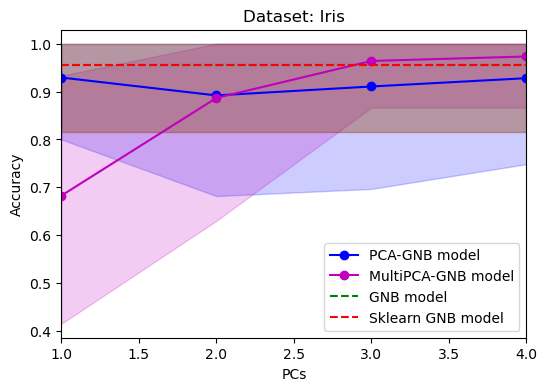

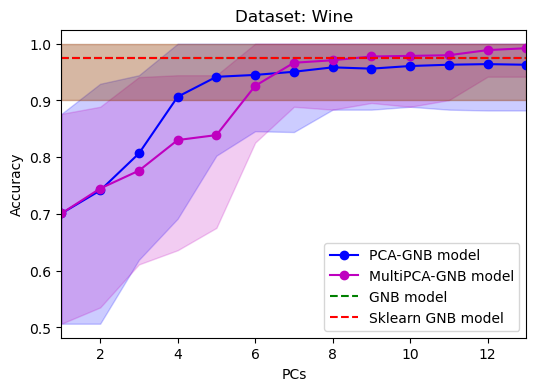

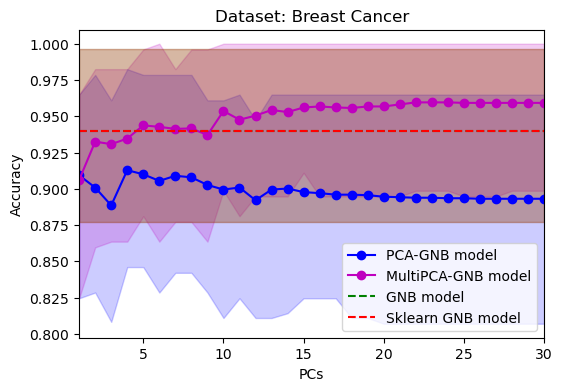

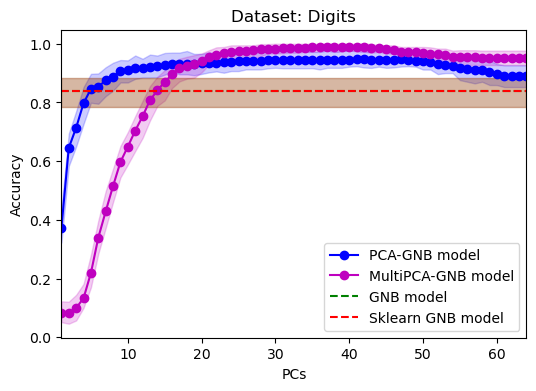

In [8]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_digits
from sklearn.naive_bayes import GaussianNB

iris = load_iris()
wine = load_wine()
breast_cancer = load_breast_cancer()
digits = load_digits()

data_list = [iris, wine, breast_cancer, digits]
data_name = ['Iris', 'Wine', 'Breast Cancer', 'Digits']

for i in range(len(data_list)):
    model_test(data_list[i], data_name[i])

### Our observation
As we can observe from the figure, the PCA-GNB model only outperforms the GNB model on digits datasets, but the MultiPCA-GNB model always outperforms the other three models after the n_components value gets large enough.

# Visualize the model

In [9]:
def vis_model_compare(X, y):
    # Init models and train
    gnb = GNB()
    gnb_sklearn = GaussianNB()
    pca_gnb = PCA_GNB()
    multipca_gnb = multiPCA_GNB()

    gnb.train(X, y)
    gnb_sklearn.fit(X, y)
    pca_gnb.train(X, y)
    multipca_gnb.train(X, y)

    # Create mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Predict for each meshgrid
    Z = gnb.predict(grid_points)
    Z = Z.reshape(xx.shape)

    Z_sklearn = gnb_sklearn.predict(grid_points)
    Z_sklearn = Z_sklearn.reshape(xx.shape)

    Z_pca = pca_gnb.predict(grid_points)
    Z_pca = Z_pca.reshape(xx.shape)

    Z_multipca = multipca_gnb.predict(grid_points)
    Z_multipca = Z_multipca.reshape(xx.shape)

    # Plot
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 4, 1)
    plt.contourf(xx, yy, Z, alpha=0.5, cmap='hsv')
    for i in np.unique(y):
        plt.scatter(X[y == i, 0], X[y == i, 1], label=f'Class {i}')
    plt.title("Our GaussianNB model", fontsize=16)
    plt.xlabel("Feature 1", fontsize=14)
    plt.ylabel("Feature 2", fontsize=14)

    plt.subplot(1, 4, 2)
    plt.contourf(xx, yy, Z_sklearn, alpha=0.5, cmap='hsv')
    for i in np.unique(y):
        plt.scatter(X[y == i, 0], X[y == i, 1], label=f'Class {i}')
    plt.title("Sklearn model", fontsize=16)
    plt.xlabel("Feature 1", fontsize=14)
    plt.ylabel("Feature 2", fontsize=14)

    plt.subplot(1, 4, 3)
    plt.contourf(xx, yy, Z_pca, alpha=0.5, cmap='hsv')
    for i in np.unique(y):
        plt.scatter(X[y == i, 0], X[y == i, 1], label=f'Class {i}')
    plt.title("PCA-GNB model", fontsize=16)
    plt.xlabel("Feature 1", fontsize=14)
    plt.ylabel("Feature 2", fontsize=14)

    plt.subplot(1, 4, 4)
    plt.contourf(xx, yy, Z_multipca, alpha=0.5, cmap='hsv')
    for i in np.unique(y):
        plt.scatter(X[y == i, 0], X[y == i, 1], label=f'Class {i}')
    plt.title("multiPCA-GNB model", fontsize=16)
    plt.xlabel("Feature 1", fontsize=14)
    plt.ylabel("Feature 2", fontsize=14)

    plt.tight_layout()
    plt.show()

In [10]:
def vis_prob_compare(X, y):
    # Initialize models and train
    gnb = GNB()
    gnb_sklearn = GaussianNB()
    pca_gnb = PCA_GNB(n_components=2)
    multipca_gnb = multiPCA_GNB(n_components=2)
    
    gnb.train(X, y)
    gnb_sklearn.fit(X, y)
    pca_gnb.train(X, y)
    multipca_gnb.train(X, y)

    # Get number of classes
    n_classes = gnb.n_classes

    # Create mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Calculate probabilities for each model
    probs = gnb.predict_prob(grid_points)
    probs_sklearn = np.exp(gnb_sklearn.predict_joint_log_proba(grid_points))
    probs_pca = pca_gnb.predict_prob(grid_points)
    probs_multipca = multipca_gnb.predict_prob(grid_points)

    # Plot the probability distributions
    plt.figure(figsize=(16, 4 * n_classes))
    for c in range(n_classes):
        plt.subplot(n_classes, 4, 4 * c + 1)
        plt.contourf(xx, yy, probs[:, c].reshape(xx.shape), cmap="coolwarm", alpha=0.6)
        plt.colorbar(label="Probability")
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap="coolwarm")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        if c == 0:
            plt.title('Our model')

        plt.subplot(n_classes, 4, 4 * c + 2)
        plt.contourf(xx, yy, probs_sklearn[:, c].reshape(xx.shape), cmap="coolwarm", alpha=0.6)
        plt.colorbar(label="Probability")
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap="coolwarm")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        if c == 0:
            plt.title('Sklearn model')

        plt.subplot(n_classes, 4, 4 * c + 3)
        plt.contourf(xx, yy, probs_pca[:, c].reshape(xx.shape), cmap="coolwarm", alpha=0.6)
        plt.colorbar(label="Probability")
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap="coolwarm")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        if c == 0:
            plt.title('PCA-GNB model')

        plt.subplot(n_classes, 4, 4 * c + 4)
        plt.contourf(xx, yy, probs_multipca[:, c].reshape(xx.shape), cmap="coolwarm", alpha=0.6)
        plt.colorbar(label="Probability")
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap="coolwarm")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        if c == 0:
            plt.title('multiPCA-GNB model')

    plt.tight_layout()
    plt.show()


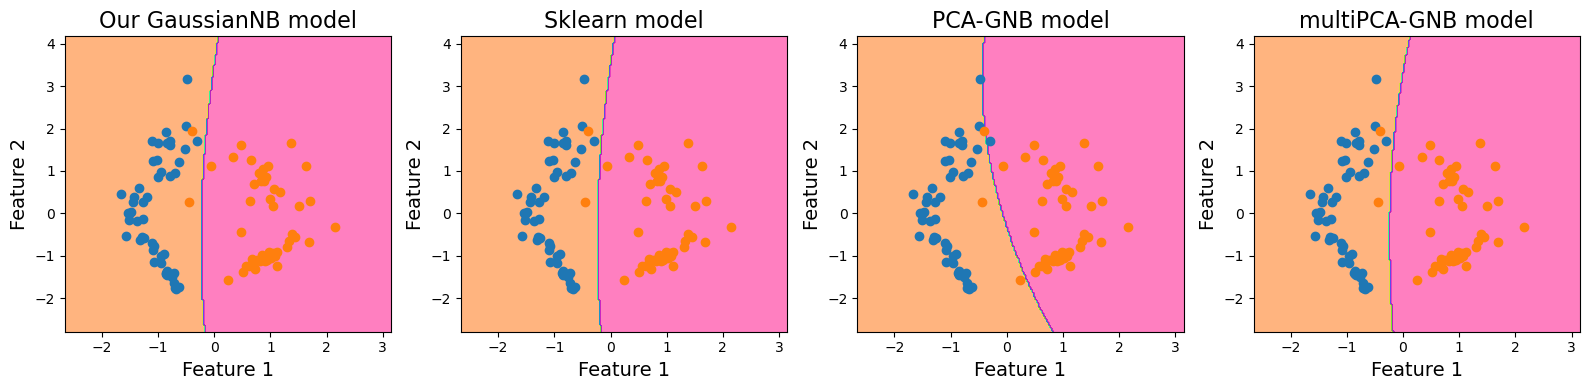

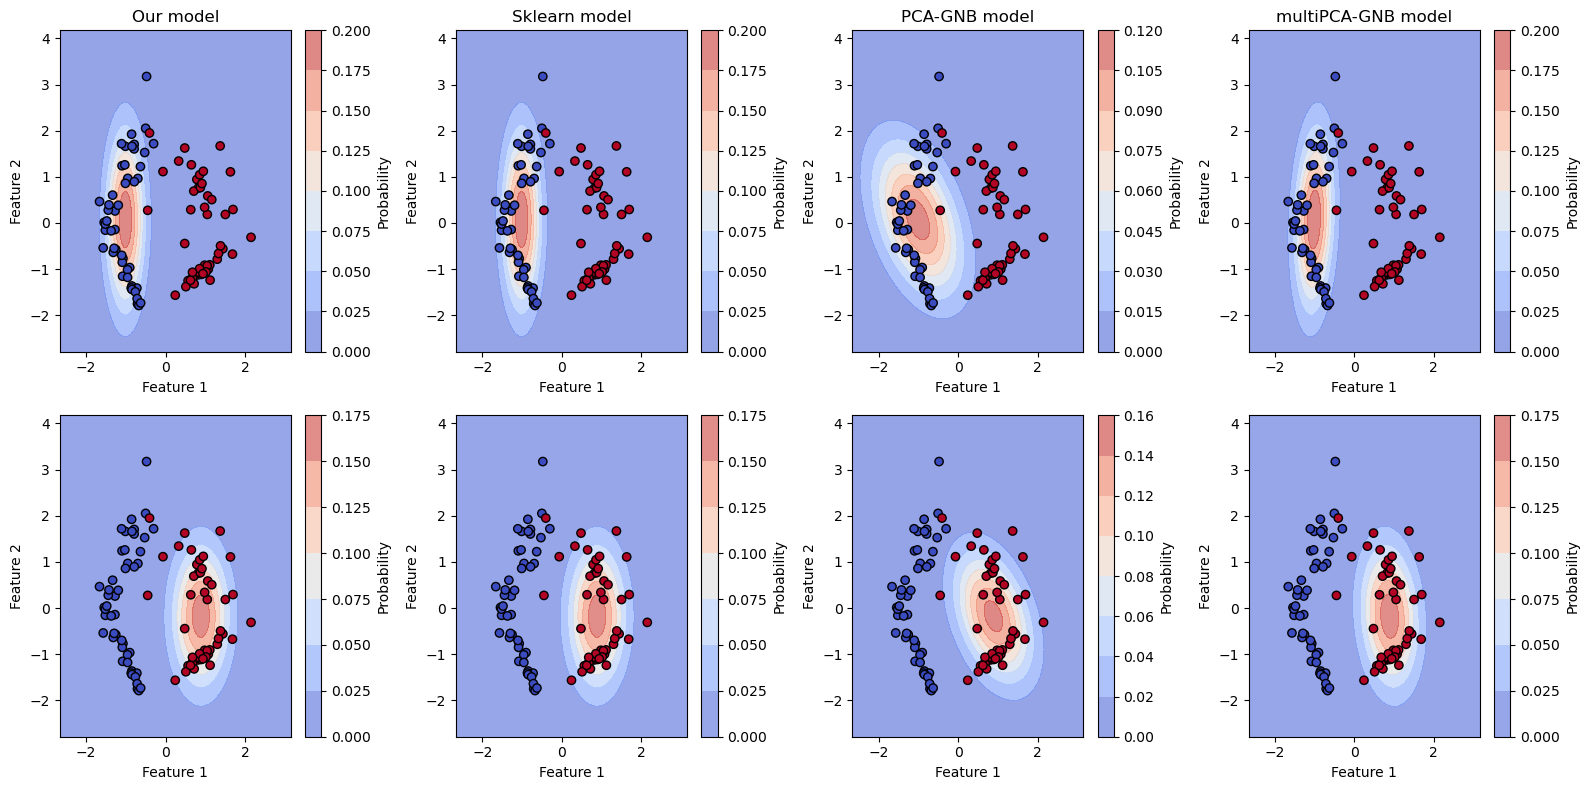

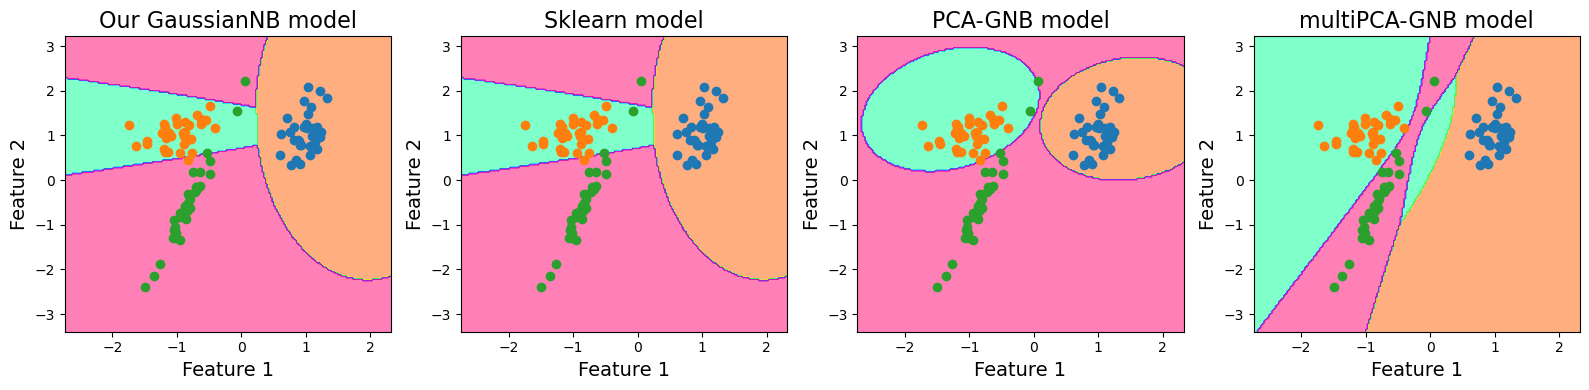

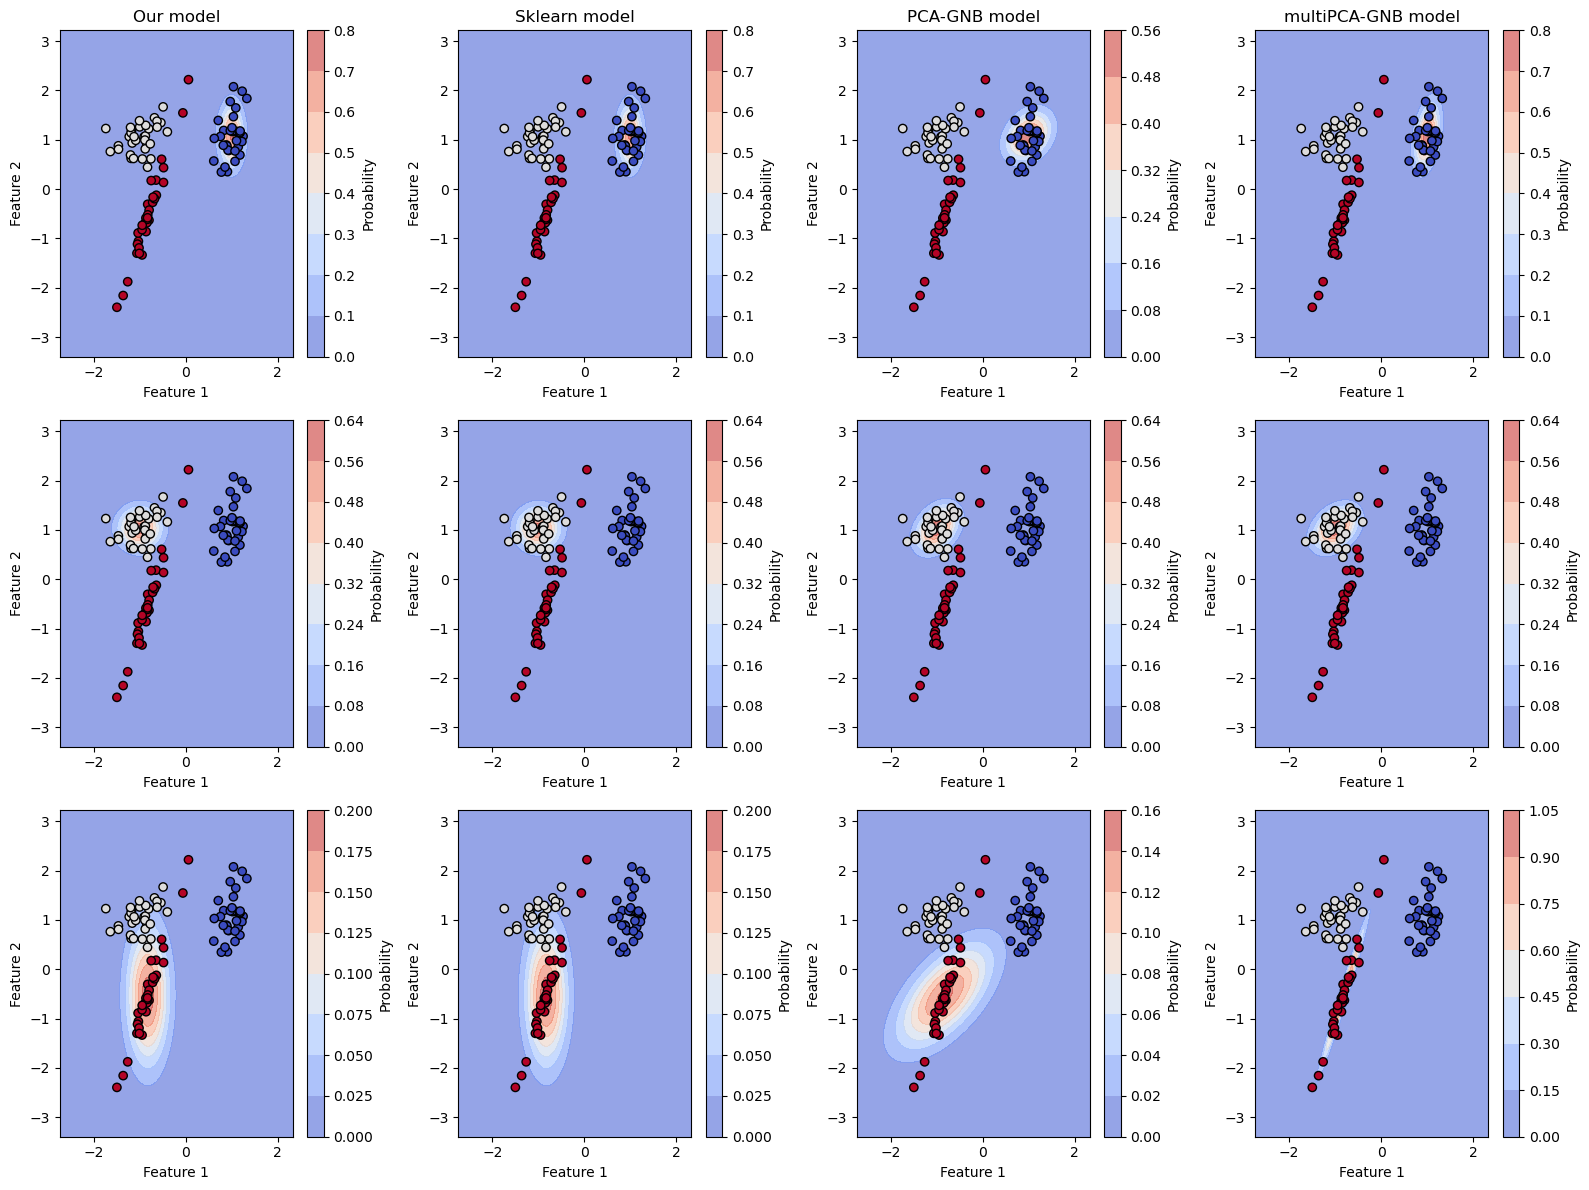

In [11]:
from sklearn.datasets import make_classification

# Two classes
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2
)

vis_model_compare(X, y)
vis_prob_compare(X, y)

# Three classes
X, y = make_classification(
    n_classes=3, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, random_state=1
)

vis_model_compare(X, y)
vis_prob_compare(X, y)

### Observation
As we can observe from the graph, our GNB model showed exactly the same decision boundary and Gaussian distribution. The GNB models both have the gaussian distribution with axes perpendicular to the feature axes due to the assumption of independent features.   
In PCA-GNB model, all the distribution all rotated to the same directions of same angles because the same PCA is performed on different classes of data. Therefore, if the data has different covariance matrix, which means data has different feature correlations in different class, only one PCA cannot capture the relation.  
In multiPCA-GNB model, we found that the gaussian distribution is well fitted for each class of data no matter what the correlation is in that class. Therefore, the multiPCA-GNB showed the best performance.